# DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21¶¶
    Author: Rupak Dey
    TASK 3: Deriving Business Problems by exploratory data analysis.
    Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 

import matplotlib.pyplot as plt    
%matplotlib inline

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn


In [4]:
store = pd.read_csv("SampleSuperstore.csv")

In [5]:
store.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [6]:
store.shape

(9994, 13)

In [8]:
store.duplicated().sum()

17

In [9]:
store.drop_duplicates(inplace=True)

# EDA (Exploratory Data Analysis)
a) Find Unwanted Columns
There is no unwanted column present in given dataset to remove.

EX: ID

b) Missing Values|

In [10]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

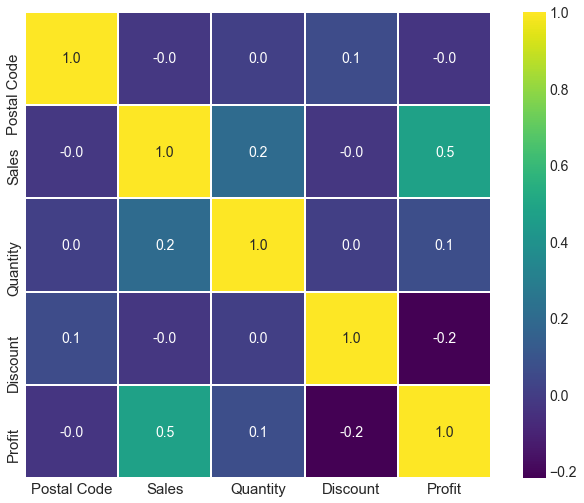

In [11]:
#Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(store.corr(), annot=True, cmap='viridis', fmt='.1f', linewidth=1, square=True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

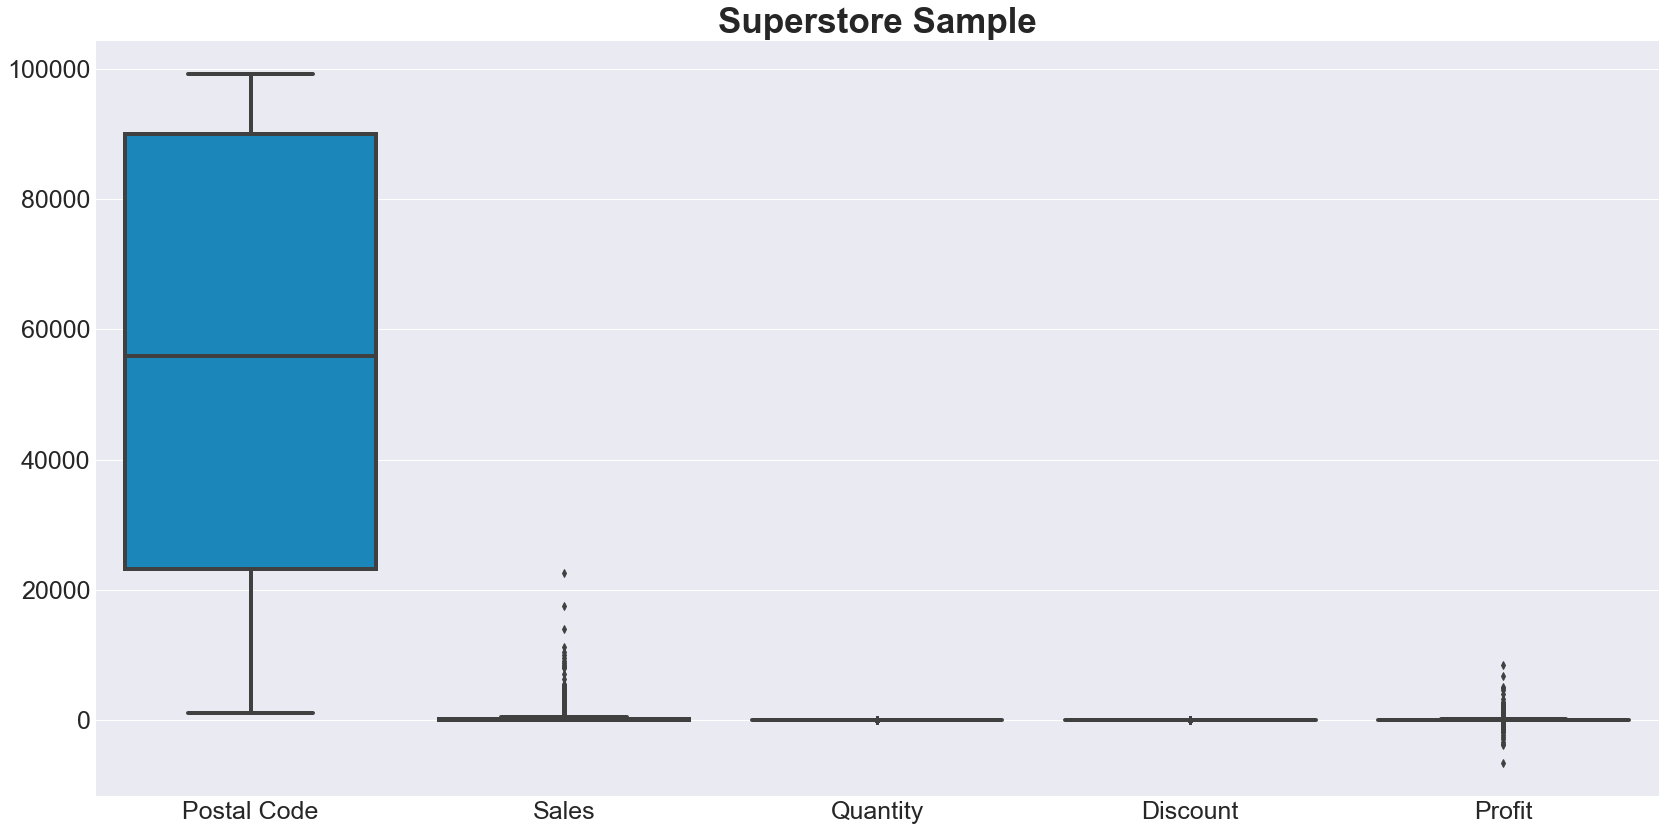

In [12]:
#Finding Outliers
plt.figure(figsize=(25,13))
sns.boxplot(data=store)

plt.title("Superstore Sample", fontsize=35, fontweight='bold')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()


In [16]:
Sale_Quan = store[['Sales','Quantity','Profit']].groupby(['Profit'],as_index=True).sum().sort_values(by='Quantity',ascending=True)

In [17]:
Sale_Quan.head()

Sales  Quantity
Profit                     
 43.7842  150.980         1
-0.8886    35.544         1
-0.8558     1.167         1
 8.5914    19.980         1
-0.8120    12.992         1

In [21]:
store.groupby(["Category", "Sub-Category"], as_index=False)["Quantity"].count()

Category Sub-Category  Quantity
0         Furniture    Bookcases       228
1         Furniture       Chairs       615
2         Furniture  Furnishings       956
3         Furniture       Tables       319
4   Office Supplies   Appliances       466
5   Office Supplies          Art       795
6   Office Supplies      Binders      1522
7   Office Supplies    Envelopes       254
8   Office Supplies    Fasteners       217
9   Office Supplies       Labels       363
10  Office Supplies        Paper      1359
11  Office Supplies      Storage       846
12  Office Supplies     Supplies       190
13       Technology  Accessories       775
14       Technology      Copiers        68
15       Technology     Machines       115
16       Technology       Phones       889

In [23]:
store.groupby("Category", sort=False)["Sub-Category"].count()

Category
Furniture          2118
Office Supplies    6012
Technology         1847
Name: Sub-Category, dtype: int64

# Data Preprocessing

# Ship Mode

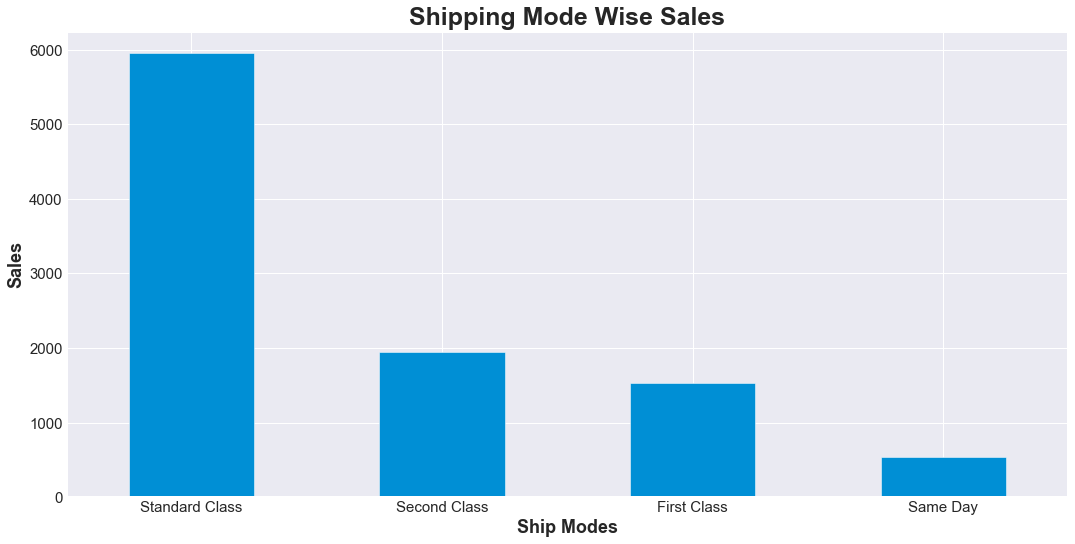

In [25]:
# Shipping Mode wise sales
plt.figure(figsize=(16,8))
store['Ship Mode'].value_counts().plot.bar()

plt.title('Shipping Mode Wise Sales', fontsize=25, fontweight='bold')

plt.ylabel('Sales', fontsize=18, fontweight='bold')
plt.xlabel('Ship Modes', fontsize=18, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#We can see that the standard class shipping is higher than the other so if we can decrease the other shipping method rates then it will be benifitial for the company.


# Segment

In [27]:
store['Segment'].nunique()

3

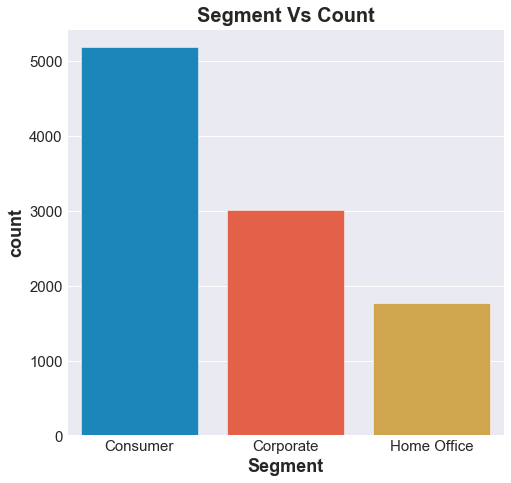

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


In [28]:
plt.figure(figsize=(7,7))
sns.countplot(store['Segment'])

plt.xlabel('Segment', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Segment Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Segment'].value_counts())


#Consumers are the biggest buyers then corportes and then Home office
#Company should try to bring more schemes for the consumers to improve the corporate sales

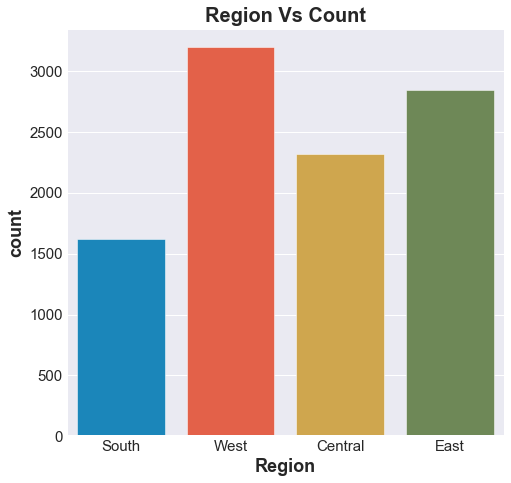

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


In [29]:
plt.figure(figsize=(7,7))
sns.countplot(store['Region'])

plt.xlabel('Region', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Region Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Region'].value_counts())

#Maximum Profit is coming from from west region

# Category

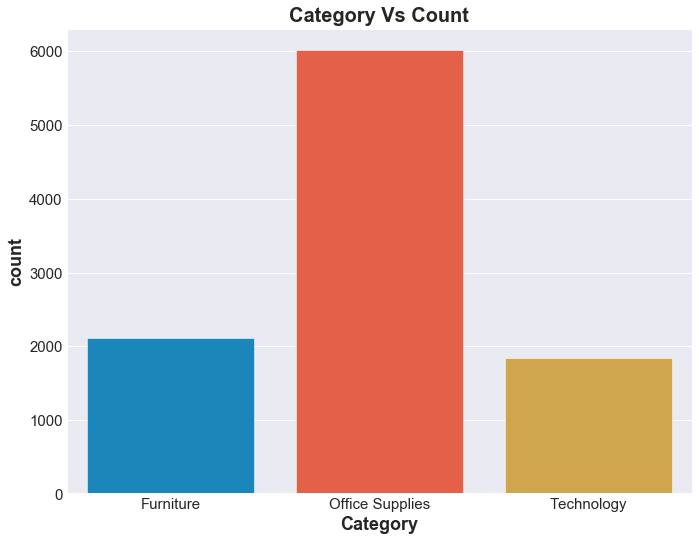

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


In [30]:
plt.figure(figsize=(10,8))
sns.countplot(store['Category'])

plt.xlabel('Category', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Category Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Category'].value_counts())
#Maximum Profit are being generated from selling office supplies

# Sub-Category

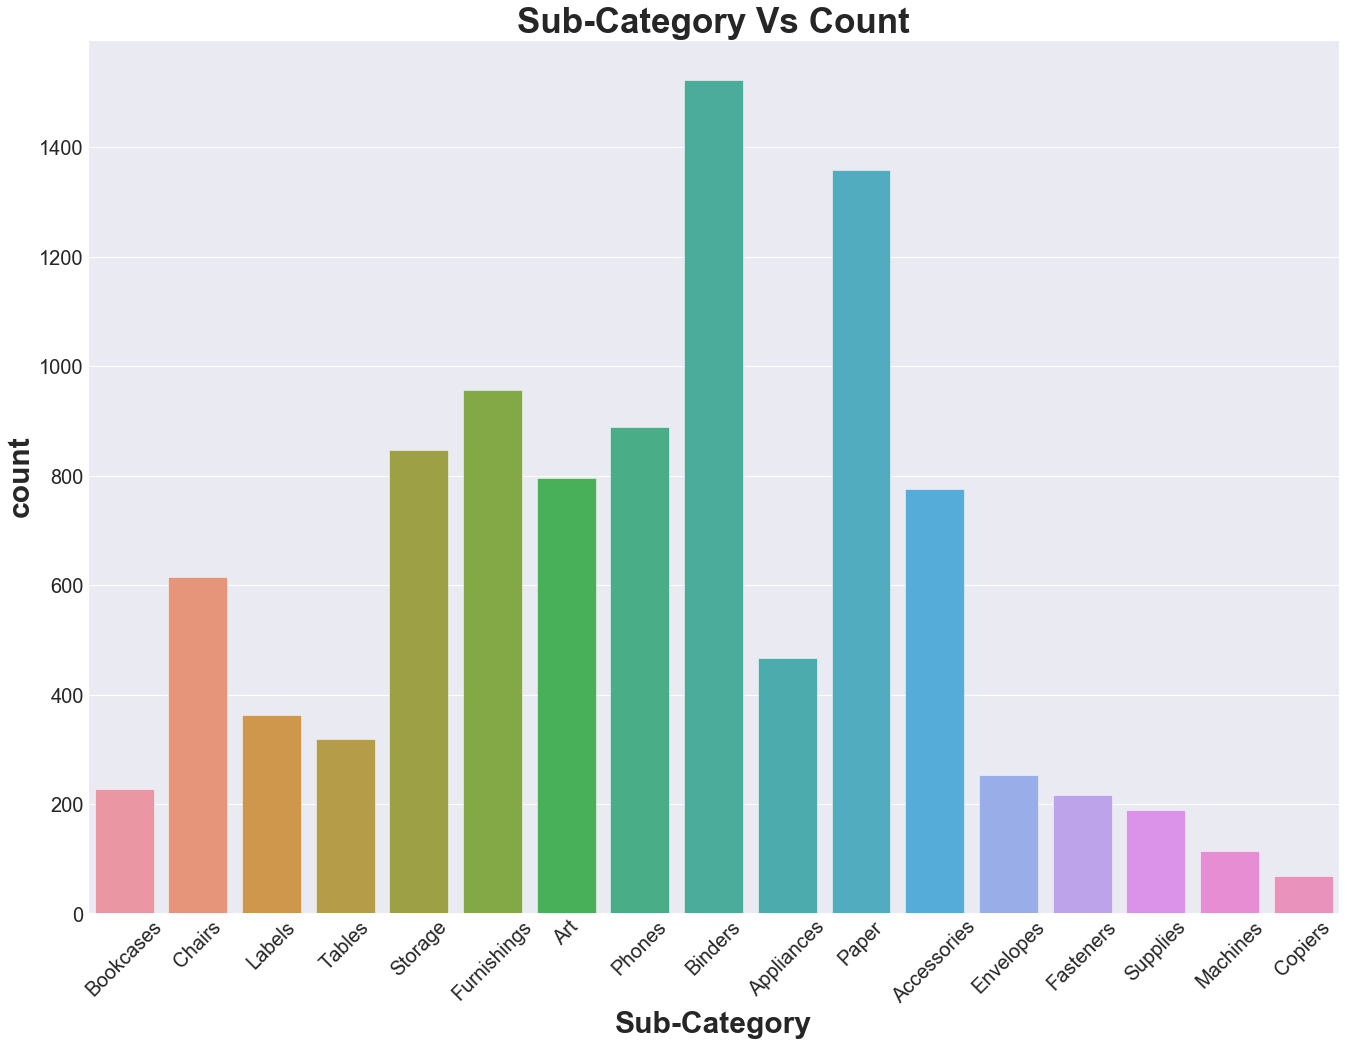

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [31]:
plt.figure(figsize=(20,15))
sns.countplot(store['Sub-Category'])

plt.xlabel('Sub-Category', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('Sub-Category Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['Sub-Category'].value_counts())


# City

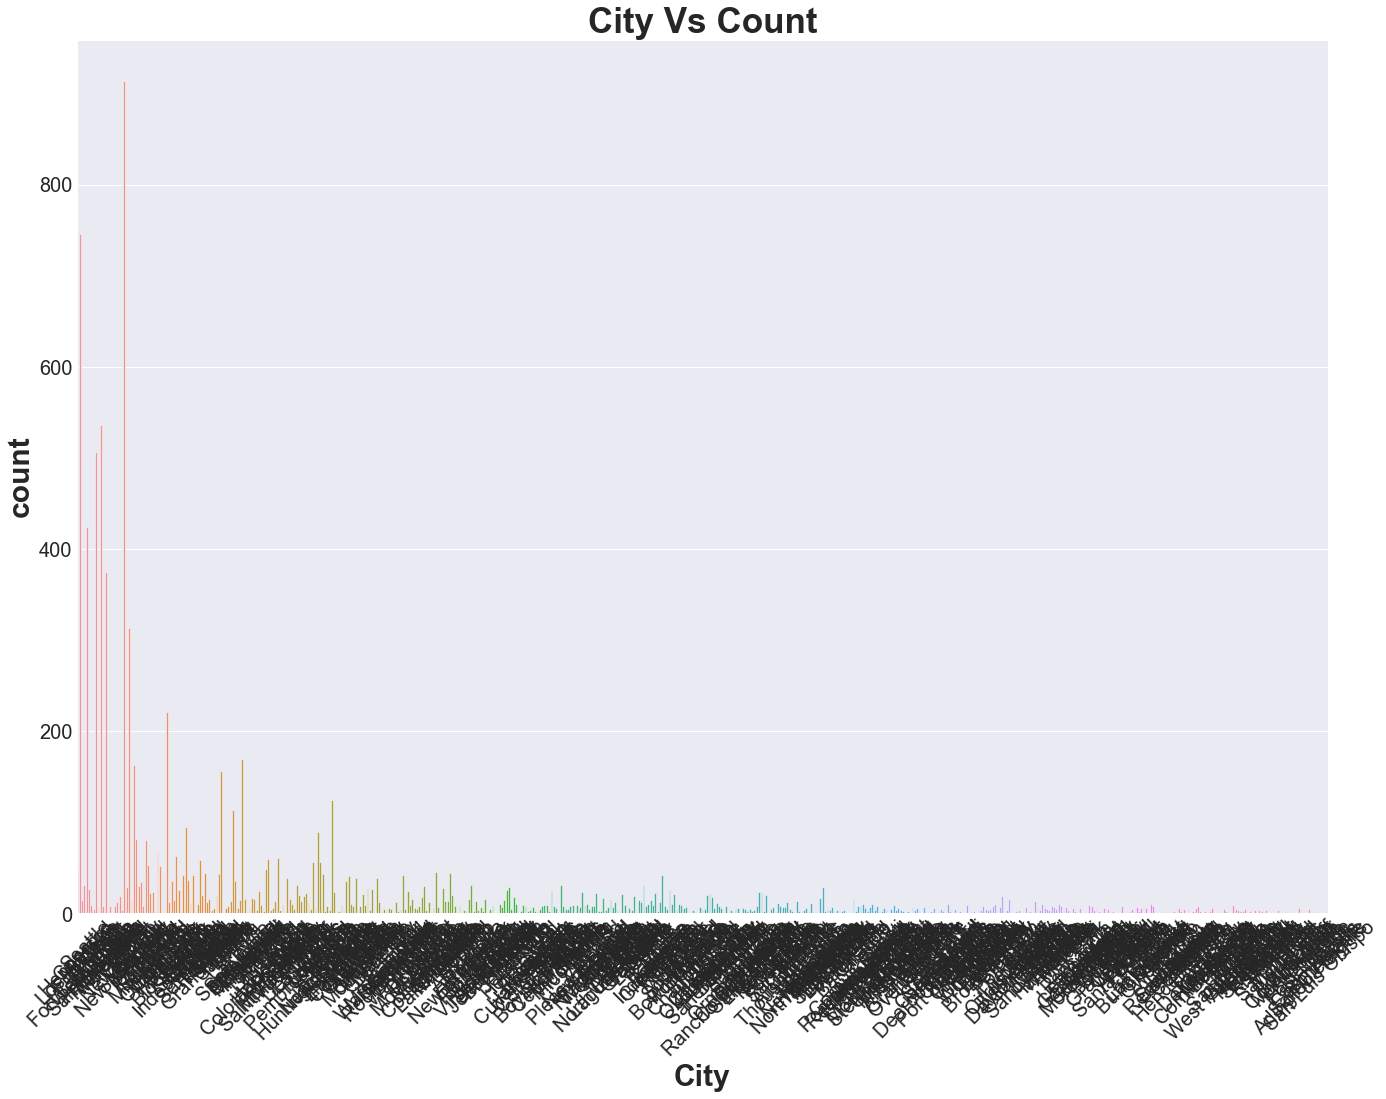

New York City        914
Los Angeles          746
Philadelphia         536
San Francisco        506
Seattle              424
                    ... 
Linden                 1
Arlington Heights      1
Redding                1
Whittier               1
Grand Island           1
Name: City, Length: 531, dtype: int64


In [33]:
plt.figure(figsize=(20,15))
sns.countplot(store['City'])

plt.xlabel('City', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('City Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['City'].value_counts())


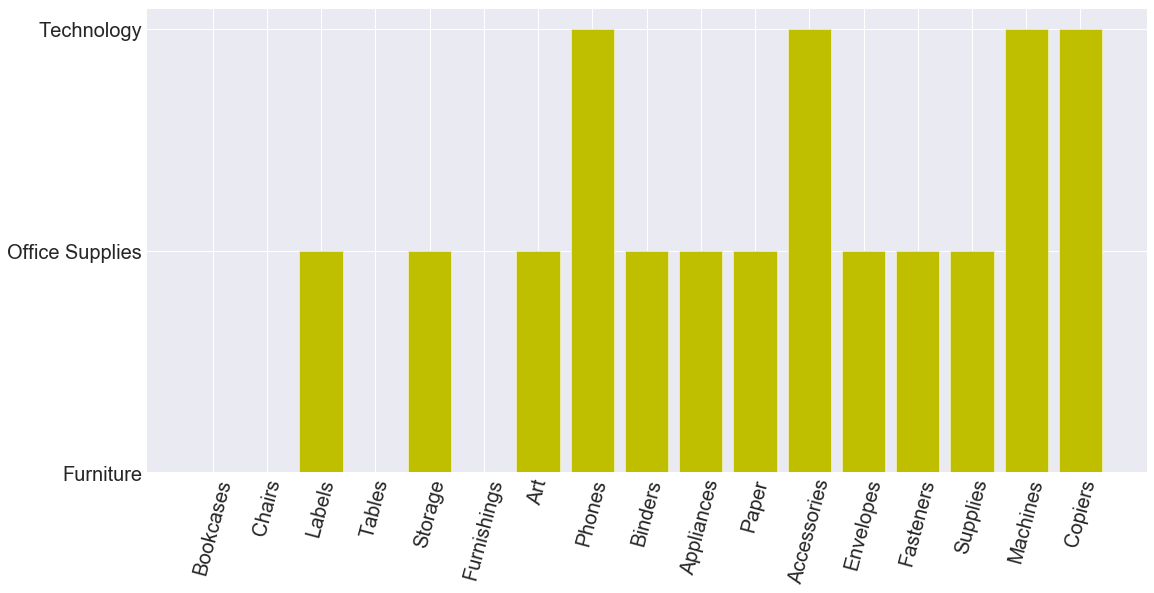

In [34]:
# Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=store, color='y')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

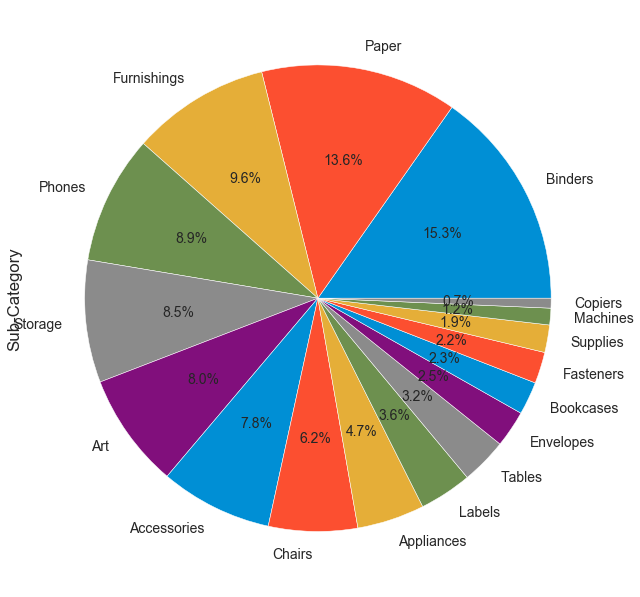

In [35]:
plt.figure(figsize=(12,10))
store['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#The store has wide variety of Office Supplies especially in Binders and Paper department.

C:\Anacond_Install\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 864x720 with 0 Axes>

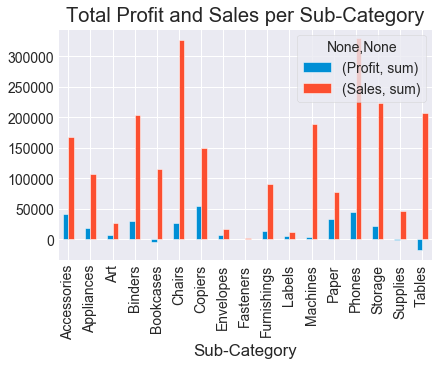

In [36]:
plt.figure(figsize=(12,10))
store.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')

plt.show()

#Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.
#Tables and bookcases are going in loss so the company should work on these two products in order to be in profit

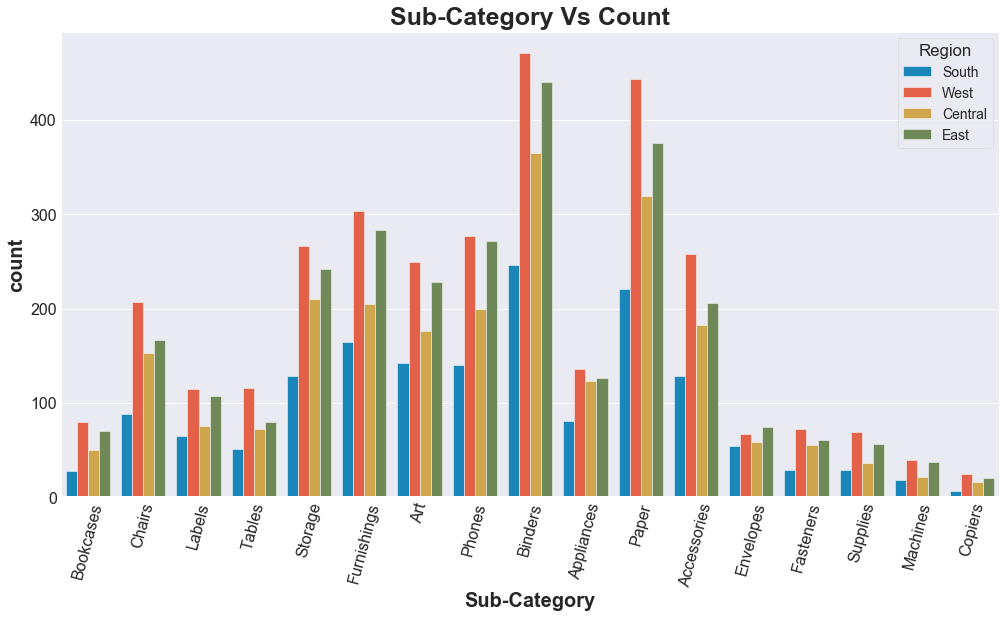

In [41]:
# Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=store)

plt.xlabel('Sub-Category', fontsize=20, fontweight='bold')
plt.ylabel('count', fontsize=20, fontweight='bold')

plt.title('Sub-Category Vs Count', fontsize=25, fontweight='bold')

plt.xticks(rotation=75, fontsize=16)
plt.yticks(fontsize=16)

plt.show()
#People residing in Western part of US tend to order more from superstore

<Figure size 1296x864 with 0 Axes>

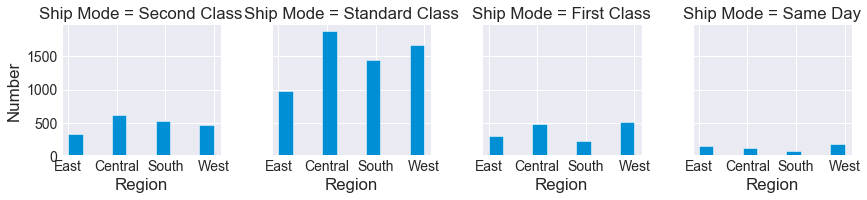

In [43]:
# Let's try to visualize the 'Region' column from the Shipmode column dataset standpoints.
plt.figure(figsize=(18,12))
region_hist = sns.FacetGrid(store,col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')
plt.show()

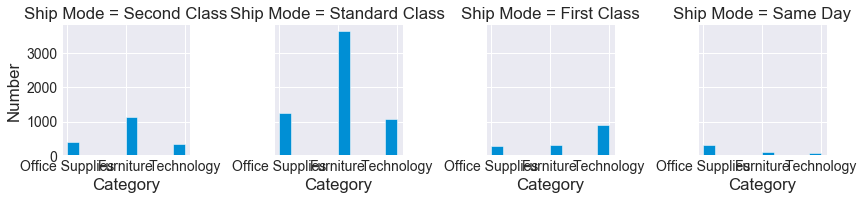

In [47]:
# Let's try to visualize the 'Category' column from the Shipmode column dataset standpoints.

category_hist = sns.FacetGrid(store, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')
category_hist.set_ylabels('Number')


In [45]:
fig = px.sunburst(store, path=['Country','Category','Sub-Category'],
                 values='Sales', color='Category',
                 hover_data =['Sales','Quantity','Profit'])
fig.update_layout(height=1000, title_text='Product Categories & Sub-Categories')
fig.show()

In [46]:
d = []
for i in store['Sub-Category'].unique():
    sales = round(store[store['Sub-Category']==i]['Sales'].sum(),2)
    profit = round(store[store['Sub-Category']==i]['Profit'].sum(),2)
    d.append([i,sales,profit])
temp = pd.DataFrame(d,columns=['Sub-Category','Sales','Profit'])
temp = temp.sort_values('Sales',ascending=True)

fig = go.Figure(data=[go.Bar(name='Sales',x=temp['Sales'],y=temp['Sub-Category'],orientation='h',marker_color = 'green'),
                      go.Bar(name='Profit',x=temp['Profit'],y=temp['Sub-Category'],orientation='h',marker_color = 'navy')])
fig.update_layout(template='simple_white',title='Sales & Profit of each Sub-Category',height=700) #barmode='stack'
fig.show()